<a href="https://colab.research.google.com/github/desunny/example/blob/desunny-steel/(forS)_Lec04_KNN%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-최근접 이웃 회귀
  - 농어의 무게를 예측하는 문제
  - 독립변수: 길이
  - 종속변수: 무게 




 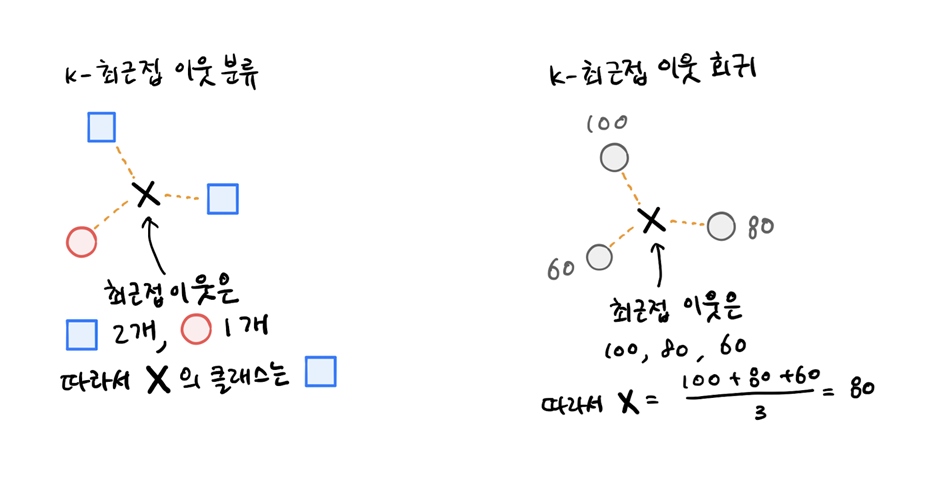

## 데이터 준비

In [ ]:
import numpy as np

In [ ]:
#농어 길이
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
#농어 무게 
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [ ]:
import matplotlib.pyplot as plt

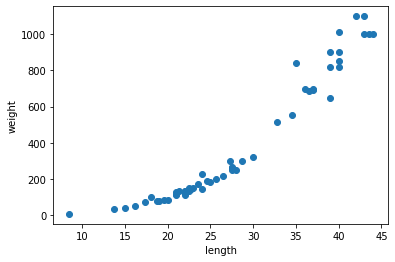

In [ ]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [ ]:
#사이킷런을 사용할 훈련 세트는 2차원 배열이어야 한다. 데이터가 1차원 배열일 경우, 2차원으로 변경해야 함 
train_input = train_input.reshape(-1, 1) #-1은 기존 데이터로 모두 채우라는 의미 
test_input = test_input.reshape(-1, 1)

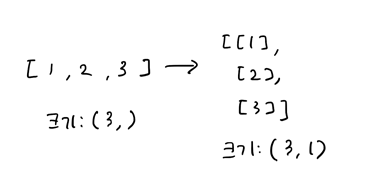

In [ ]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정 계수 ($ R^2$)
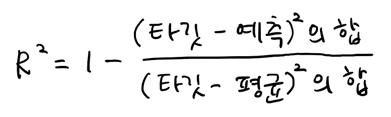

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# R^2 점수 
knr.score(test_input, test_target)

NameError: ignored

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 타겟과 예측한 값의 평균 절대값 오차. 
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


## 과대적합 vs 과소적합

In [ ]:
# 훈련데이터에 대한 R^2 점수. 과대적합? 과소적합?  테스트 세트 0.99, 훈련세트 0.98 
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
# 이웃의 갯수를 3으로 설정합니다. 모델을 조금 더 복잡하게 만들기. 훈련세트에 좀 더 적합하게 만들기. 
knr.n_neighbors = 3 #하이퍼파라미터 조정 
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target))

0.974645996398761


## K최근접 이웃 실습
  - K최근접 이웃 회귀모델의 K값을 1, 5, 10으로 바꾸어가며 훈련하고
    농어의 길이를 5에서 45로 바꿔가며 예측하여 그래프로 그리기

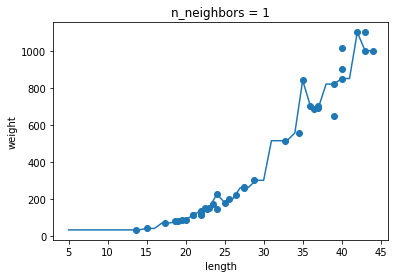

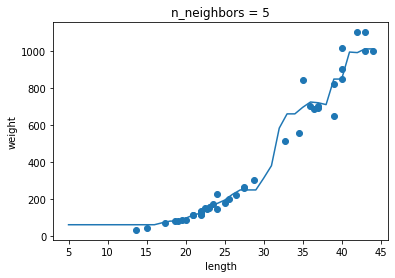

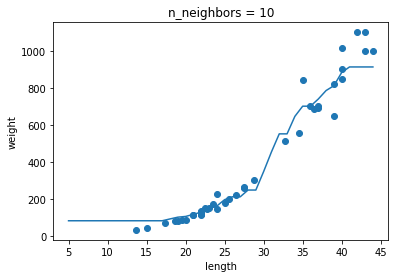

In [ ]:
# k-최근접 이웃 회귀 객체를 만듭니다

# 5에서 45까지 x 좌표를 만듭니다

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # k수 지정 

    # 모델 훈련
    
    # 지정한 범위 x에 대한 예측 구하기 
    
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()